# Playing with NH Ralph MVIC TDI data

This is really just an exercise in figuring out this is not the data I want to try and make pretty pictures to spectral analysis with. It's useful to see the process for initially poking at FITS data, but a lot of work could have been avoided if I had RTFD [here](http://new-pds-rings-2.seti.org/newhorizons/SOC_INST_ICD.PDF).

In [14]:
# our routine imports
import pyfits
import numpy as np
from matplotlib import pyplot as plt


In [3]:
# hooray for invoking shell comands
!ls data/20070131_003252/

mc0_0032528036_0x536_sci_1.fit	mc2_0032528036_0x536_sci_1.fit
mc0_0032528036_0x536_sci_1.lbl	mc2_0032528036_0x536_sci_1.lbl
mc1_0032528036_0x536_sci_1.fit	mc3_0032528036_0x536_sci_1.fit
mc1_0032528036_0x536_sci_1.lbl	mc3_0032528036_0x536_sci_1.lbl


In [8]:
# long, narrow swaths -- this matches 
fits_file = 'data/20070131_003252/mc0_0032528036_0x536_sci_1.fit'
pyfits.info(fits_file)

Filename: data/20070131_003252/mc0_0032528036_0x536_sci_1.fit
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU     294   (5024, 57)   float32   
1                ImageHDU         7   (5024, 57)   float64   
2                ImageHDU         8   (5024, 57)   float32   
3                ImageHDU        15   (5024, 57)   int16   


In [ ]:
# From info below and http://new-pds-rings-2.seti.org/newhorizons/SOC_INST_ICD.PDF we can
# see that this is really a time delay integrat mode capture. Not going to be fun, spectrally.

In [10]:
hdr = pyfits.getheader(fits_file)
hdr

SIMPLE  =                    T / Written by IDL:  Wed Aug 27 09:59:15 2008      
BITPIX  =                  -32 / IEEE single precision floating point           
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 5024                                                  
NAXIS2  =                   57                                                  
EXTEND  =                    T                                                  
BZERO   =                    0 / no offset                                      
BSCALE  =                    1 / default scaling factor                         
MISSION = 'New Horizons'       / Mission name                                   
HOSTNAME= 'NEW HORIZONS'       / Host name (PDS terminology)                    
HOSTID  = 'NH      '           / Host ID (PDS terminology)                      
INSTRU  = 'mvi     '           / Instrument                                     
APID    = '0x536   '        

In [25]:
data = pyfits.getdata(fits_file, 0)
np.shape(data)

(57, 5024)

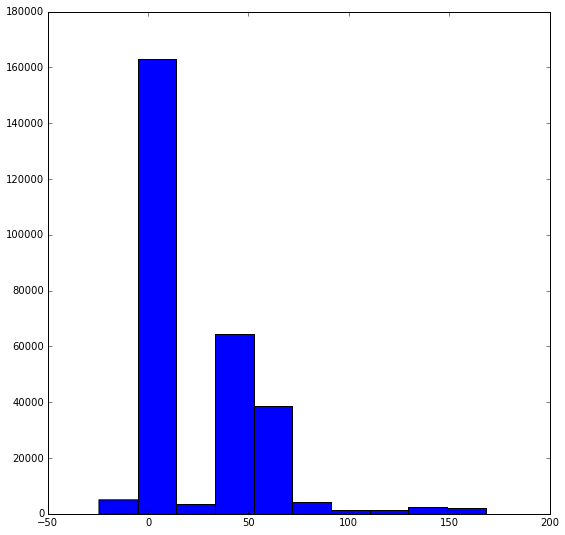

In [29]:
%matplotlib inline
plt.figure(figsize=(9,9))
plt.hist(np.ravel(data))
plt.show()

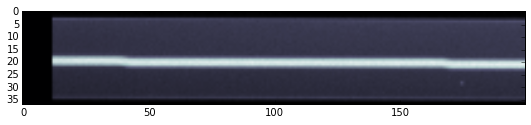

In [26]:
plt.figure(figsize=(9,9))
plt.imshow(data[20:,:200], cmap='bone', clim=(0,160))
plt.show()

In [27]:
test = pyfits.getdata(fits_file, 1)
np.shape(test)

(57, 5024)

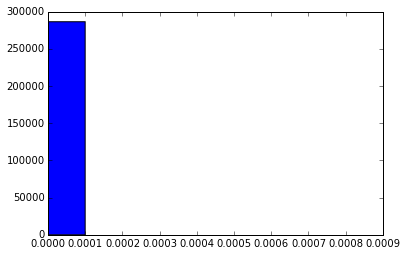

1

In [35]:
plt.hist(np.ravel(test), bins=np.arange(0.0, 0.001, 0.0001))
plt.show()
x = np.unique(np.ravel(test))
len(x)

In [38]:
x # ok, theis img is

array([ 0.])

In [58]:
data2, hdr2 = pyfits.getdata(fits_file, 2, header=True)
hdr2

XTENSION= 'IMAGE   '           / IMAGE extension                                
BITPIX  =                  -32 / Number of bits per data pixel                  
NAXIS   =                    2 / Number of data axes                            
NAXIS1  =                 5024 /                                                
NAXIS2  =                   57 /                                                
COMMENT  1-sigma error per pixel for the image in extension 1.                  
COMMENT  Units are in DN.                                                       
COMMENT  See the SOC Instrument ICD for more details.                           

In [40]:
np.shape(data2)

(57, 5024)

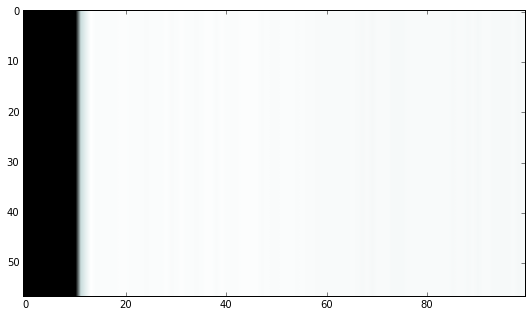

In [46]:
plt.figure(figsize=(9,9))
plt.imshow(data2[:,:100], cmap='bone')
plt.show()

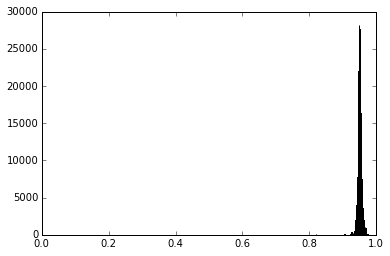

In [49]:
plt.hist(np.ravel(data2), bins=np.arange(0.0, 1.0, 0.001))
plt.show()

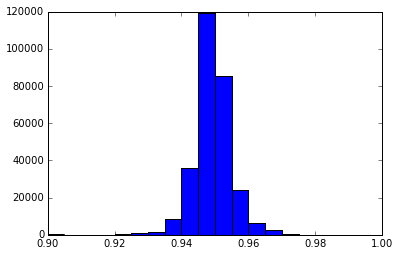

In [51]:
plt.hist(np.ravel(data2), bins=np.arange(0.9, 1.0, 0.005))
plt.show()

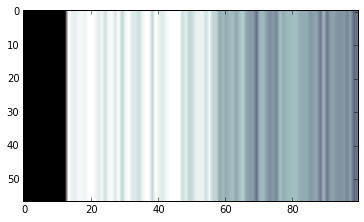

In [53]:
plt.imshow(data2[:,:100], cmap='bone', clim=(0.93, 0.96))

In [56]:
img, hdr = pyfits.getdata(fits_file, 2, header=True)

In [57]:
hdr

XTENSION= 'IMAGE   '           / IMAGE extension                                
BITPIX  =                  -32 / Number of bits per data pixel                  
NAXIS   =                    2 / Number of data axes                            
NAXIS1  =                 5024 /                                                
NAXIS2  =                   57 /                                                
COMMENT  1-sigma error per pixel for the image in extension 1.                  
COMMENT  Units are in DN.                                                       
COMMENT  See the SOC Instrument ICD for more details.                           